In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_final_train = pd.read_csv('../data/final_train.csv',index_col=0)

In [3]:
df_feature = pd.read_csv('../data/feature.csv',index_col=0)

In [4]:
df_feature.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,bedroomabvgr,bsmtfinsf1,bsmtfinsf2,bsmtfullbath,bsmthalfbath,bsmtunfsf,enclosedporch,...,masvnrtype,mszoning,neighborhood,paveddrive,roofmatl,roofstyle,salecondition,saletype,street,utilities
0,856,854,0,3,706,0,1,0,150,0,...,BrkFace,RL,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1262,0,0,3,978,0,0,1,284,0,...,None,RL,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,920,866,0,3,486,0,1,0,434,0,...,BrkFace,RL,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,961,756,0,3,216,0,1,0,540,272,...,None,RL,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1145,1053,0,4,655,0,1,0,490,0,...,BrkFace,RL,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [5]:
feature_info = []
for col in df_final_train.columns:
    n_unique = len(df_final_train[col].unique())
    feature_info.append({'feature':col, 'n_unique': n_unique, 'datatype':df_final_train[col].dtype})
feature_info_df = pd.DataFrame(feature_info)

In [6]:
feature_info_df[(feature_info_df.datatype == 'object')] 

,datatype,feature,n_unique
37,object,alley,2
38,object,bldgtype,5
39,object,bsmtcond,4
40,object,bsmtexposure,4
41,object,bsmtfintype1,6
42,object,bsmtfintype2,6
43,object,bsmtqual,4
44,object,centralair,2
45,object,condition1,9
46,object,condition2,8


In [7]:
corr_matrix = df_final_train.corr()
corr_matrix["saleprice"].sort_values(ascending = False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
1stFlrSF         0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
garageyrblt      0.508043
yearremodadd     0.507101
masvnrarea       0.478854
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.334901
wooddecksf       0.324413
2ndFlrSF         0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
3SsnPorch        0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: saleprice, dtype: float64

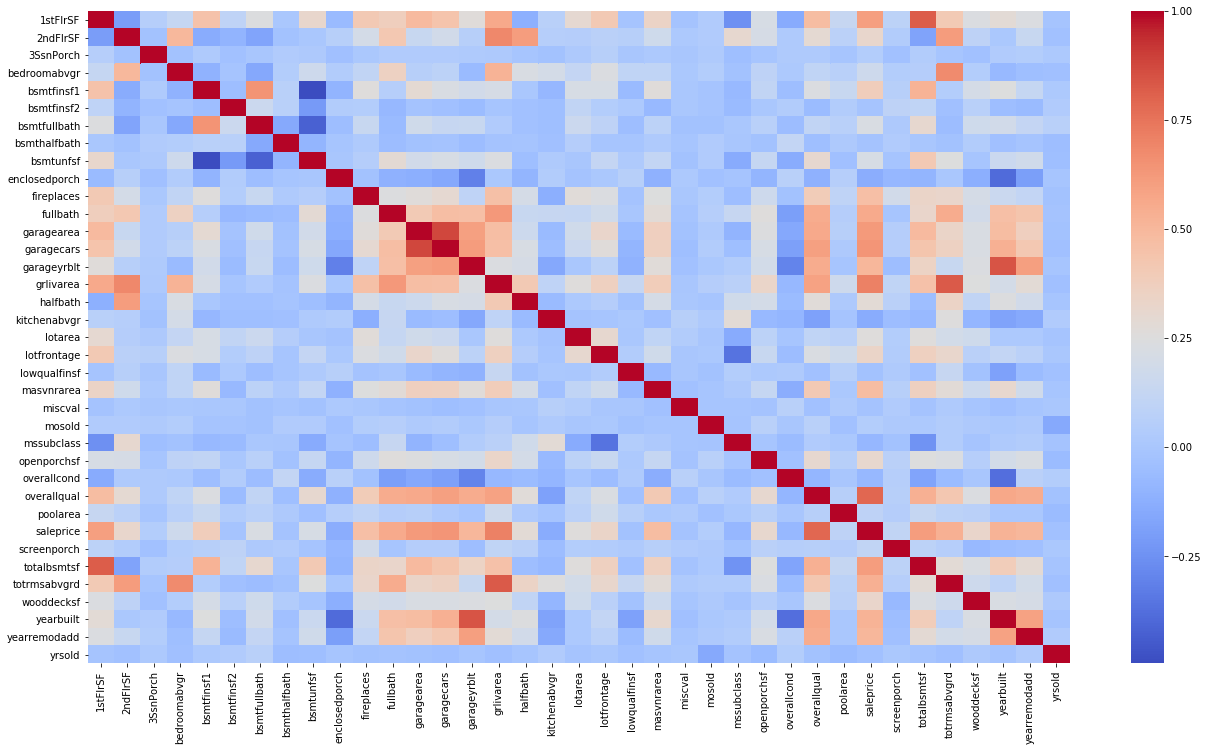

In [8]:
f, ax = plt.subplots(figsize=(22,12))
sns.heatmap(df_final_train.corr(),cmap = 'coolwarm')

Text(0.5,6.8,'overallqual')

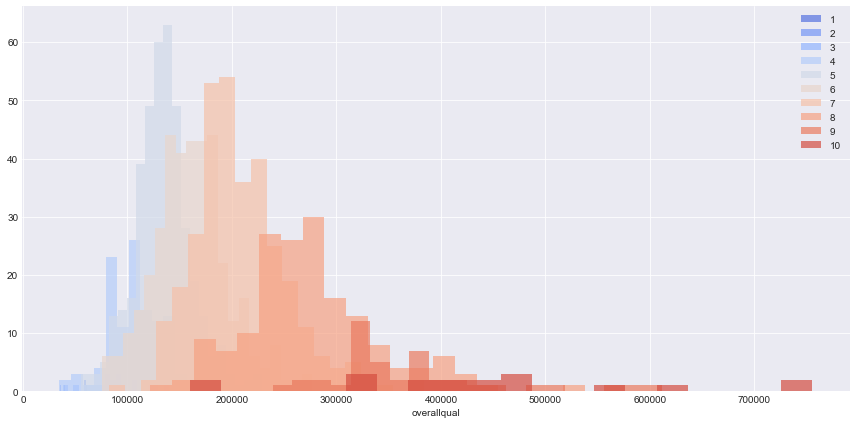

In [9]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df_final_train,hue="overallqual",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'saleprice',bins=20,alpha=0.7)
plt.legend()
plt.xlabel('overallqual')

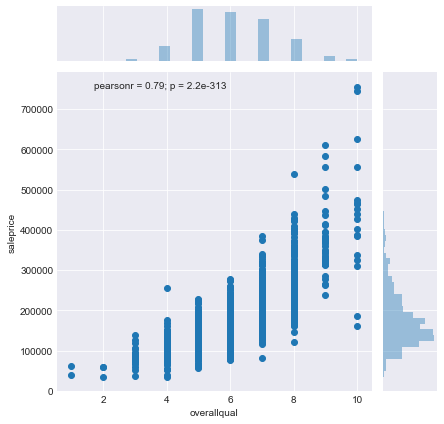

In [10]:
sns.jointplot(x='overallqual',y='saleprice',data=df_final_train)

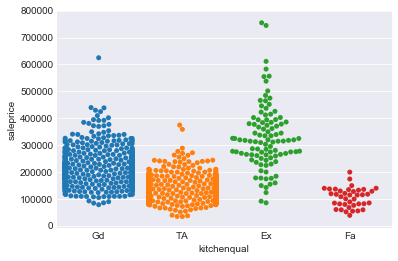

In [11]:
sns.swarmplot(x='kitchenqual',y='saleprice',data=df_final_train)

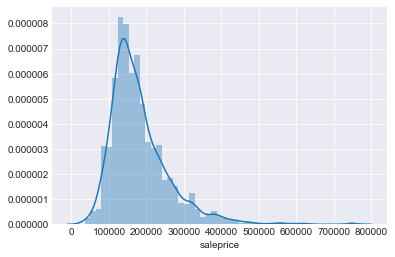

In [12]:
sns.distplot(df_final_train['saleprice'])

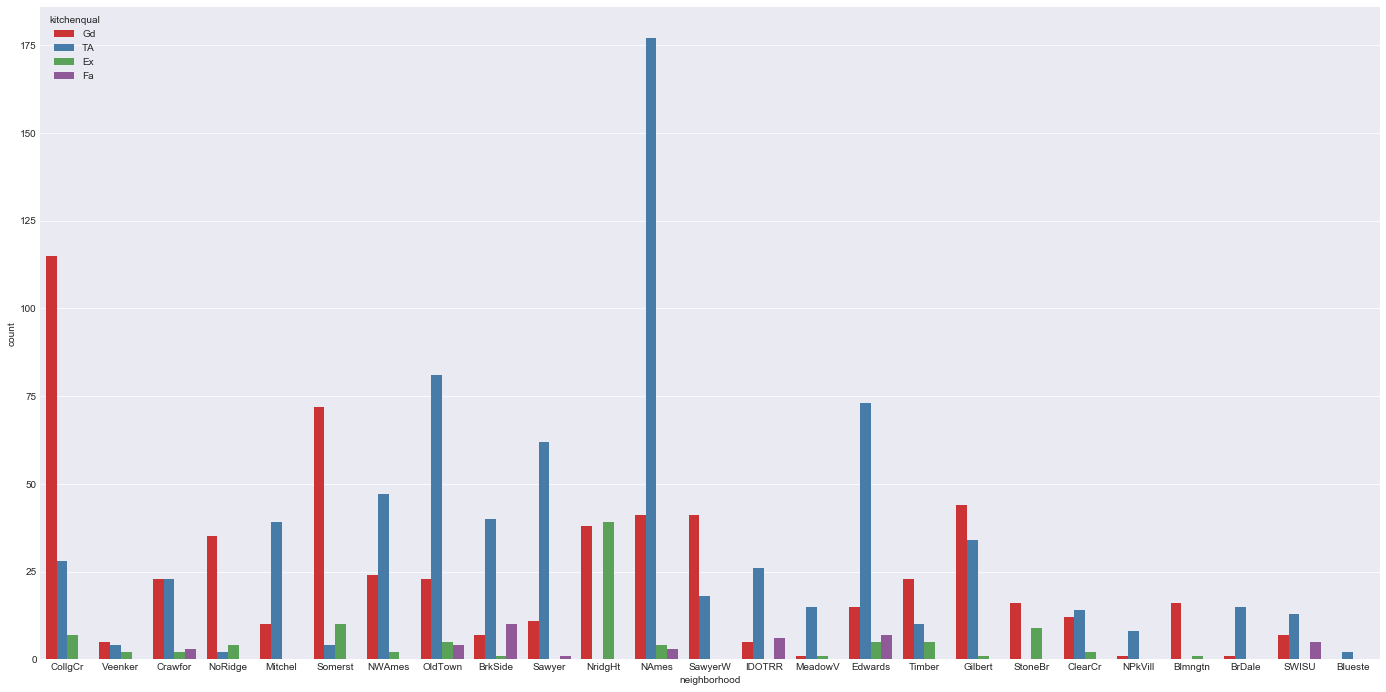

In [13]:
plt.figure(figsize=(24,12))
sns.countplot(x='neighborhood',hue='kitchenqual',data=df_final_train,palette='Set1')

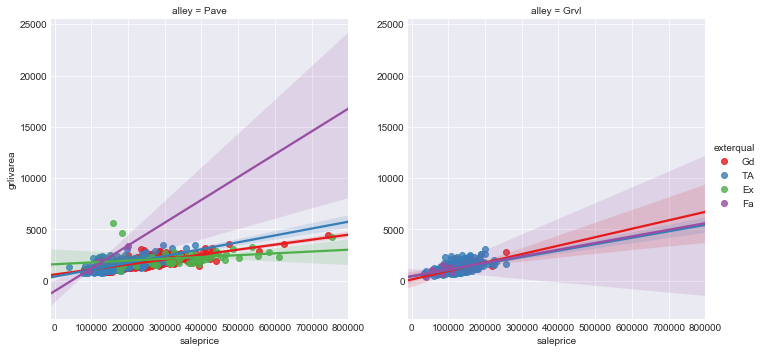

In [14]:
plt.figure(figsize=(24,12))
sns.lmplot(y='grlivarea',x='saleprice',data=df_final_train,hue='exterqual',
           col='alley',palette='Set1')

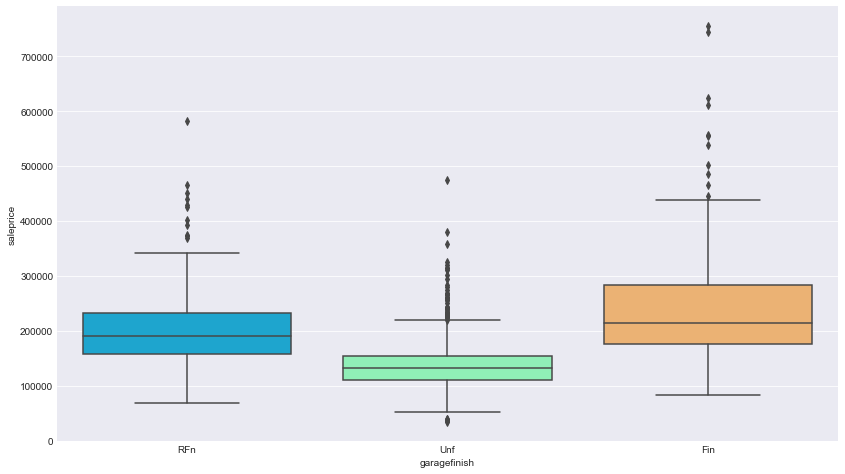

In [15]:
plt.figure(figsize=(14,8))
sns.boxplot(x='garagefinish',y='saleprice',data=df_final_train,palette='rainbow')

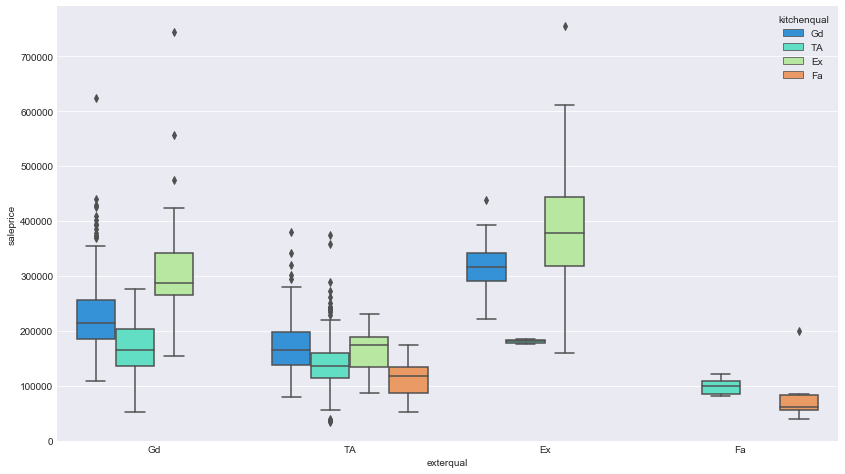

In [16]:
plt.figure(figsize=(14,8))
sns.boxplot(x='exterqual',y='saleprice',data=df_final_train,palette='rainbow',hue="kitchenqual")

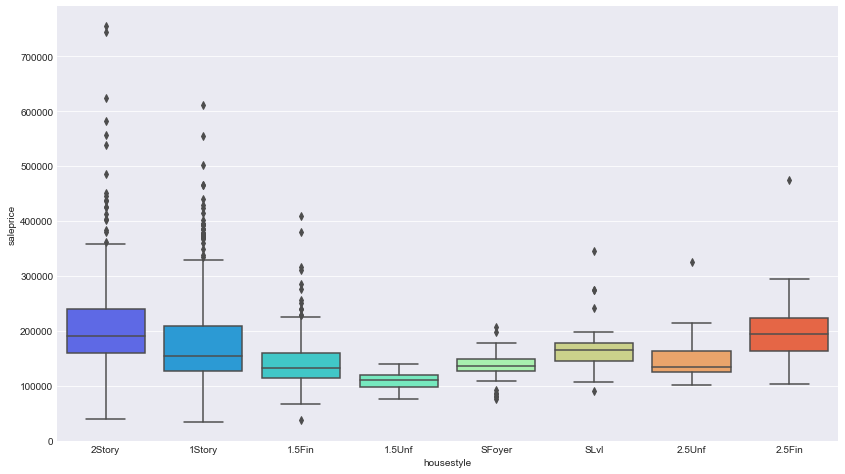

In [17]:
plt.figure(figsize=(14,8))
sns.boxplot(x='housestyle',y='saleprice',data=df_final_train,palette='rainbow')

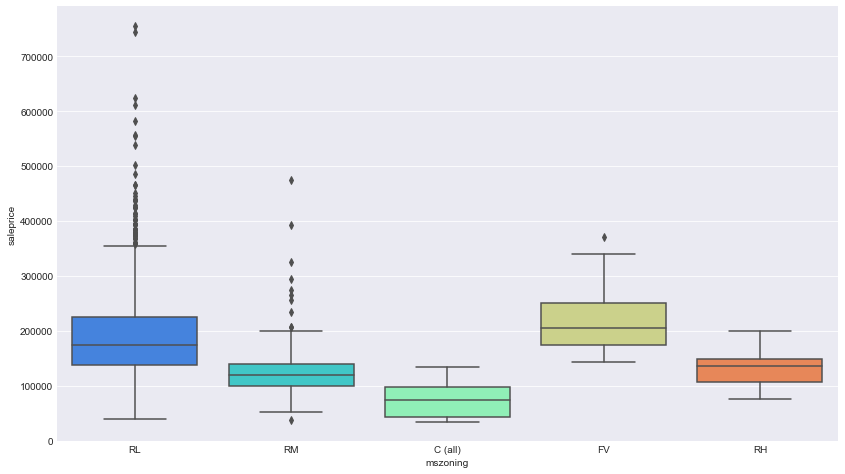

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(x='mszoning',y='saleprice',data=df_final_train,palette='rainbow')

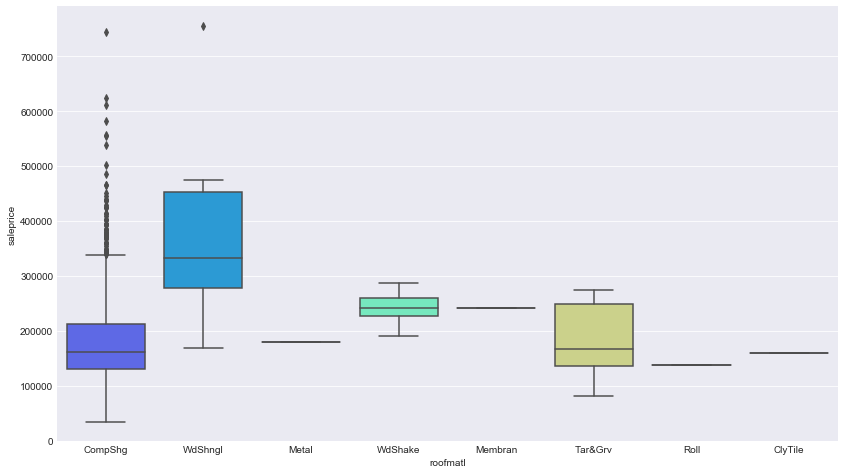

In [19]:
plt.figure(figsize=(14,8))
sns.boxplot(x='roofmatl',y='saleprice',data=df_final_train,palette='rainbow')

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca_df = df_feature.select_dtypes(exclude=['object'])

In [22]:
pca = PCA()
pca.fit(pca_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

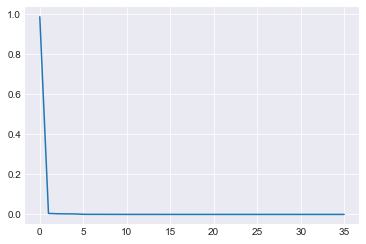

In [23]:
plt.plot(pca.explained_variance_ratio_)

In [24]:
pca_df.corr()


,1stFlrSF,2ndFlrSF,3SsnPorch,bedroomabvgr,bsmtfinsf1,bsmtfinsf2,bsmtfullbath,bsmthalfbath,bsmtunfsf,enclosedporch,...,overallcond,overallqual,poolarea,screenporch,totalbsmtsf,totrmsabvgrd,wooddecksf,yearbuilt,yearremodadd,yrsold
1stFlrSF,1.000000,-0.202646,0.056104,0.127401,0.445863,0.097117,0.244671,0.001956,0.317987,-0.065292,...,-0.144203,0.476224,0.131525,0.088758,0.819530,0.409516,0.235459,0.281986,0.240379,-0.013604
2ndFlrSF,-0.202646,1.000000,-0.024358,0.502901,-0.137079,-0.099260,-0.169494,-0.023855,0.004469,0.061989,...,0.028942,0.295493,0.081487,0.040606,-0.174512,0.616423,0.092165,0.010308,0.140024,-0.028700
3SsnPorch,0.056104,-0.024358,1.000000,-0.024478,0.026451,-0.029993,-0.000106,0.035114,0.020764,-0.037305,...,0.025504,0.030371,-0.007992,-0.031436,0.037384,-0.006683,-0.032771,0.031355,0.045286,0.018645
bedroomabvgr,0.127401,0.502901,-0.024478,1.000000,-0.107355,-0.015728,-0.150673,0.046519,0.166643,0.041570,...,0.012980,0.101676,0.070703,0.044300,0.050450,0.676620,0.046854,-0.070651,-0.040581,-0.036014
bsmtfinsf1,0.445863,-0.137079,0.026451,-0.107355,1.000000,-0.050117,0.649212,0.067418,-0.495251,-0.102303,...,-0.046231,0.239666,0.140491,0.062021,0.522396,0.044316,0.204306,0.249503,0.128451,0.014359
bsmtfinsf2,0.097117,-0.099260,-0.029993,-0.015728,-0.050117,1.000000,0.158678,0.070948,-0.209294,0.036543,...,0.040229,-0.059119,0.041709,0.088871,0.104810,-0.035227,0.067898,-0.049107,-0.067759,0.031706
bsmtfullbath,0.244671,-0.169494,-0.000106,-0.150673,0.649212,0.158678,1.000000,-0.147871,-0.422900,-0.049911,...,-0.054942,0.111098,0.067616,0.023148,0.307351,-0.053275,0.175315,0.187599,0.119470,0.067049
bsmthalfbath,0.001956,-0.023855,0.035114,0.046519,0.067418,0.070948,-0.147871,1.000000,-0.095804,-0.008555,...,0.117821,-0.040150,0.020025,0.032121,-0.000315,-0.023836,0.040161,-0.038162,-0.012337,-0.046524
bsmtunfsf,0.317987,0.004469,0.020764,0.166643,-0.495251,-0.209294,-0.422900,-0.095804,1.000000,-0.002538,...,-0.136841,0.308159,-0.035092,-0.012579,0.415360,0.250647,-0.005316,0.149040,0.181133,-0.041258
enclosedporch,-0.065292,0.061989,-0.037305,0.041570,-0.102303,0.036543,-0.049911,-0.008555,-0.002538,1.000000,...,0.070356,-0.113937,0.054203,-0.082864,-0.095478,0.004151,-0.125989,-0.387268,-0.193919,-0.009916


In [25]:
pca = PCA(2)
pca.fit(pca_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca_df.shape

(1460, 36)

In [27]:
ames_pca_df = pd.DataFrame(pca.transform(pca_df), 
                               columns=['Dim 1', 'Dim 2'],
                               index=pca_df.index)

In [28]:
ames_pca_df.shape

(1460, 2)

In [29]:
pca.components_

array([[ 1.16476384e-02,  2.24445578e-03,  6.01414964e-05,
         9.81259701e-06,  9.82485404e-03,  1.79654289e-03,
         8.24575210e-06,  1.14862625e-06, -1.01871301e-04,
        -1.12976296e-04,  1.75673448e-05,  7.00023590e-06,
         3.88355032e-03,  1.16574704e-05,  1.12884102e-05,
         1.39155686e-02,  7.33455509e-07, -3.91507252e-07,
         9.99702432e-01,  6.78080133e-04,  2.34744152e-05,
         1.89321402e-03,  1.89413373e-03,  3.41232126e-07,
        -5.92684370e-04,  5.65955157e-04, -6.54215010e-07,
         1.48026029e-05,  3.13711313e-04,  2.42009838e-04,
         1.15195256e-02,  3.10875653e-05,  2.16117029e-03,
         4.49400321e-05,  2.96892925e-05, -1.90090380e-06],
       [ 4.22230219e-01,  1.92099681e-01,  1.39980719e-03,
         3.70132007e-04,  2.39258949e-01, -1.00133866e-02,
         1.03223850e-04, -1.06313203e-05,  2.52908857e-01,
        -4.73243555e-03,  3.78620703e-04,  4.43920505e-04,
         1.73471902e-01,  5.78059074e-04,  1.40906163e-